<a href="https://colab.research.google.com/github/hayari/GoMyCodeML/blob/master/Iris_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
# load dataset
iris = datasets.load_iris()
# features
X = iris.data[:, :]  
# target
y = iris.target

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = to_categorical(encoded_Y)

In [0]:
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.1)
X_model, X_valid, y_model, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

In [0]:
model= Sequential([
   Dense(16, input_dim = 4, activation='relu'),    
   Dense(3, activation='softmax') ])

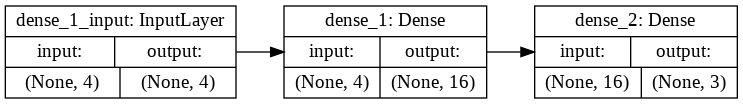

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,rankdir='LR')

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"]) # Configure the model for training
history = model.fit(X_model, y_model, validation_data=(X_valid, y_valid), epochs= 150) #training

Train on 108 samples, validate on 27 samples
Epoch 1/150
108/108 [==============================] - 2s 16ms/step - loss: 2.1867 - accuracy: 0.3519 - val_loss: 1.9359 - val_accuracy: 0.2963
Epoch 2/150
108/108 [==============================] - 0s 150us/step - loss: 2.0108 - accuracy: 0.3519 - val_loss: 1.7773 - val_accuracy: 0.2963
Epoch 3/150
108/108 [==============================] - 0s 153us/step - loss: 1.8584 - accuracy: 0.3519 - val_loss: 1.6282 - val_accuracy: 0.2963
Epoch 4/150
108/108 [==============================] - 0s 148us/step - loss: 1.7007 - accuracy: 0.3519 - val_loss: 1.4893 - val_accuracy: 0.2963
Epoch 5/150
108/108 [==============================] - 0s 144us/step - loss: 1.5594 - accuracy: 0.3519 - val_loss: 1.3586 - val_accuracy: 0.2963
Epoch 6/150
108/108 [==============================] - 0s 152us/step - loss: 1.4181 - accuracy: 0.3519 - val_loss: 1.2390 - val_accuracy: 0.2963
Epoch 7/150
108/108 [==============================] - 0s 150us/step - loss: 1.2956 - 

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


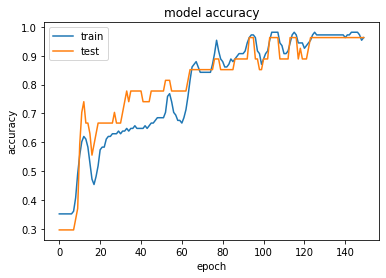

In [17]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

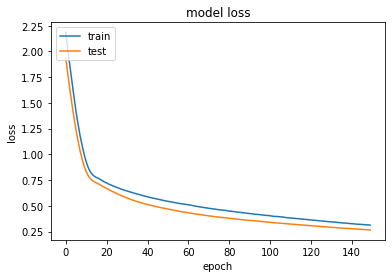

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()